In [72]:
# This is just a preamble that sets a bunch of options up.

# render graphs inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)
pd.set_option('precision', 5)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [73]:
path = '/Users/kim/Downloads/HistoricalQuotes (4).csv'

In [74]:
import csv
with open(path, 'r') as fi:
    reader = csv.reader(fi)
    for row in reader:
        print ', '.join(row)

date, close, volume, open, high, low
16:00, 95.90, 15,799,859, 94.65, 96.69, 94.21
2016/04/21, 94.9800, 19897510.0000, 97.3100, 97.3800, 94.7800
2016/04/20, 96.7700, 25643260.0000, 94.3400, 96.9800, 93.1400
2016/04/19, 94.3400, 55668150.0000, 99.4900, 101.3700, 94.2000
2016/04/18, 108.4000, 30667210.0000, 109.9000, 110.7000, 106.0200
2016/04/15, 111.5100, 11731280.0000, 110.6400, 111.8500, 109.7803
2016/04/14, 110.4200, 9546279.0000, 110.0100, 111.6400, 109.1500
2016/04/13, 109.6500, 16691020.0000, 108.0000, 111.2800, 107.8800
2016/04/12, 106.9800, 12406400.0000, 103.1500, 107.2200, 102.2100
2016/04/11, 102.6800, 7441959.0000, 104.0400, 104.9800, 102.6200
2016/04/08, 103.8100, 7842263.0000, 105.1200, 105.3260, 102.8200
2016/04/07, 104.4500, 10767280.0000, 104.3100, 106.4350, 103.6000
2016/04/06, 104.8300, 9596782.0000, 105.3000, 106.4400, 104.2500
2016/04/05, 104.9400, 10041100.0000, 103.4700, 105.7500, 103.2500
2016/04/04, 104.3500, 10928410.0000, 105.9000, 105.9200, 103.2000
2016/04/

### Look how _pretty_ this is!

In [75]:
dataset = pd.read_csv(path)
dataset.head()

,date,close,volume,open,high,low
0,16:00,95.900,"15,799,859",94.650,96.690,94.210
1,2016/04/21,94.980,19897510.0000,97.310,97.380,94.780
2,2016/04/20,96.770,25643260.0000,94.340,96.980,93.140
3,2016/04/19,94.340,55668150.0000,99.490,101.370,94.200
4,2016/04/18,108.400,30667210.0000,109.900,110.700,106.020


In [77]:
# We can manipulate the data!
dataset['high'] - dataset['low']
None

In [78]:
# Sort by date
dataset = dataset[1:]
dataset.set_index('date', inplace=True)
dataset.sort(inplace=True)
dataset.head(10)

,close,volume,open,high,low
date,,,,,
2011/04/21,36.031,36907987.0000,34.877,36.046,34.799
2011/04/25,35.953,69284110.0000,36.387,36.426,35.429
2011/04/26,32.701,110541373.0000,33.873,34.604,32.471
2011/04/27,33.709,56249441.0000,32.667,33.801,32.164
2011/04/28,33.481,30817810.0000,33.286,34.206,33.234
2011/04/29,33.239,20896161.0000,33.257,33.639,33.100
2011/05/02,33.885,35524122.0000,34.031,34.267,33.486
2011/05/03,33.034,32453480.0000,33.670,33.706,32.571
2011/05/04,32.741,33518495.0000,33.114,33.143,32.186


In [79]:
# Feature Scale Volume!
dataset['volume'] = dataset['volume'].astype(float) * 1e-6

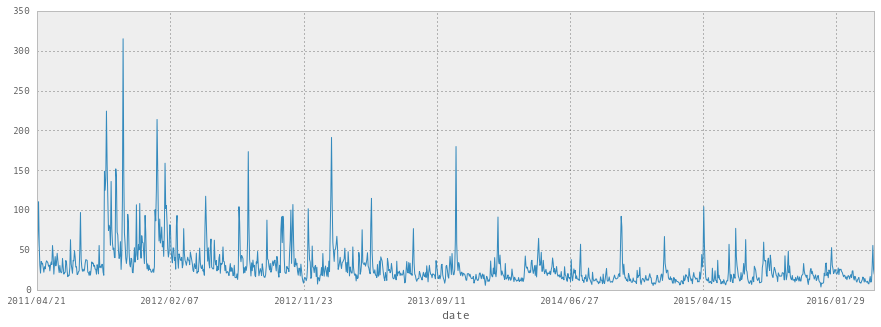

In [80]:
# What does the volume look like?
dataset['volume'].plot()

## Plot prices!

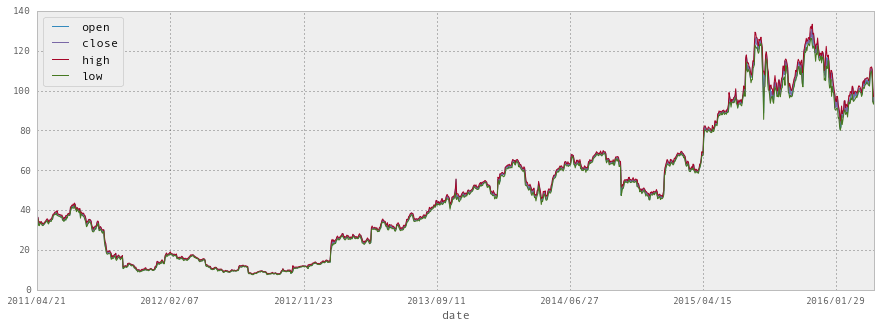

In [81]:
dataset[['open', 'close', 'high', 'low']].plot()

# Let's predict closing prices with Machine Learning!

In [82]:
# split columns into two sets. 
# Explanatory variables, X. Dependent Variable, Y

X = dataset[['volume', 'open', 'high', 'low']]
Y = dataset['close']

print(X.head())
print(Y.head())

            volume   open   high    low
date                                   
2011/04/21  36.908 34.877 36.046 34.799
2011/04/25  69.284 36.387 36.426 35.429
2011/04/26 110.541 33.873 34.604 32.471
2011/04/27  56.249 32.667 33.801 32.164
2011/04/28  30.818 33.286 34.206 33.234
date
2011/04/21   36.031
2011/04/25   35.953
2011/04/26   32.701
2011/04/27   33.709
2011/04/28   33.481
Name: close, dtype: float64


In [83]:
# Split the data into training and test sets

train_len = int(len(dataset) * .9)

X_train = X[:train_len]
Y_train = Y[:train_len]
X_test = X[train_len:]
Y_test = Y[train_len:]

print('Train size:', len(X_train))
print('Test size:', len(X_test))

('Train size:', 1132)
('Test size:', 126)


In [84]:
# Import the algorithm!

from sklearn.linear_model import LinearRegression
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional
 |      whether to calculate the intercept for this model. If set
 |      to false, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      If True, the regressors X will be normalized before regression.
 |  
 |  copy_X : boolean, optional, default True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, optional, default 1
 |      The number of jobs to use for the computation.
 |      If -1 all CPUs are used. This will only provide speedup for
 |      n_targets > 1 and sufficient large problems.
 |  
 |  Attributes
 |  ----------
 |  coef_ : array, shape (n_features, ) or (n_targets, n_features)
 |  

In [85]:
# 1. Create the model

model = LinearRegression()

# 2. Fit the model

model.fit(X_train, Y_train)

# 3. Test it!

print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))


0.99965759623
0.983755197236


## How does the machine predict?

In [86]:
# Print the model equation

eq = "close = "
for i in range(len(X_train.columns)):
    eq += "%.6f * %s + " % (model.coef_[i], X_train.columns[i])
eq += "%.6f" % model.intercept_

print("Linear regression model:")
print(eq)

Linear regression model:
close = 0.000449 * volume + -0.548604 * open + 0.747805 * high + 0.802857 * low + -0.035815


# Let's try a different data set! How about past prices?

In [87]:
days_to_look_back = 5
prev_close = dataset['close']

for i in range(1, days_to_look_back + 1):

    prev_close = dataset['close'].shift(i)
    
    dataset['prev_close_%d' % i] = prev_close

dataset.head()

,close,volume,open,high,low,prev_close_1,prev_close_2,prev_close_3,prev_close_4,prev_close_5
date,,,,,,,,,,
2011/04/21,36.031,36.908,34.877,36.046,34.799,nan,nan,nan,nan,nan
2011/04/25,35.953,69.284,36.387,36.426,35.429,36.031,nan,nan,nan,nan
2011/04/26,32.701,110.541,33.873,34.604,32.471,35.953,36.031,nan,nan,nan
2011/04/27,33.709,56.249,32.667,33.801,32.164,32.701,35.953,36.031,nan,nan
2011/04/28,33.481,30.818,33.286,34.206,33.234,33.709,32.701,35.953,36.031,nan


In [88]:
# Drop NaN's

dataset.dropna(inplace=True)
dataset.head()

,close,volume,open,high,low,prev_close_1,prev_close_2,prev_close_3,prev_close_4,prev_close_5
date,,,,,,,,,,
2011/04/29,33.239,20.896,33.257,33.639,33.100,33.481,33.709,32.701,35.953,36.031
2011/05/02,33.885,35.524,34.031,34.267,33.486,33.239,33.481,33.709,32.701,35.953
2011/05/03,33.034,32.453,33.670,33.706,32.571,33.885,33.239,33.481,33.709,32.701
2011/05/04,32.741,33.518,33.114,33.143,32.186,33.034,33.885,33.239,33.481,33.709
2011/05/05,32.901,27.490,32.341,33.397,32.317,32.741,33.034,33.885,33.239,33.481


In [89]:
# Split the data into training and test sets

X2 = dataset[['prev_close_%d' % i for i in range(1, days_to_look_back + 1)]]

Y2 = dataset['close']

X2_train = X2[:train_len]
Y2_train = Y2[:train_len]
X2_test = X2[train_len:]
Y2_test = Y2[train_len:]

print('Train size:', len(X2_train))
print('Test size:', len(X2_test))

from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(X2_train, Y2_train)

('Train size:', 1132)
('Test size:', 121)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

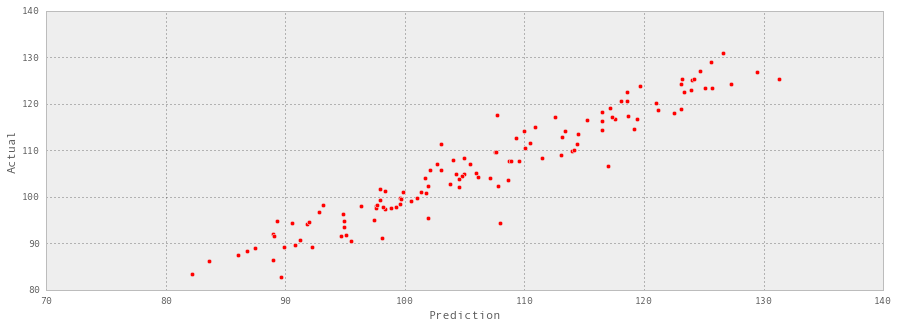

In [90]:
# Scatter the actual prices vs. predicted prices

Y2_pred = model2.predict(X2_test)
plt.scatter(x = Y2_pred, y = Y2_test, c = 'r')
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [91]:
print(model2.score(X2_train, Y2_train))
print(model2.score(X2_test, Y2_test))

0.99683650203
0.91628414654


# Which days are great for stocks?

In [92]:
# What are returns?
dataset['return'] = (dataset['close'] - dataset['open'])/dataset['open']

In [93]:
# Define previous day open-to-close returns

days_to_look_back = 5
prev_return = dataset['return']

for i in range(1, days_to_look_back + 1):
    prev_return = dataset['return'].shift(i)
    dataset['prev_return_%d' % i] = prev_return
dataset.dropna(inplace=True)
print(dataset.head())

            close  volume   open   high    low  prev_close_1  prev_close_2  \
date                                                                         
2011/05/06 32.781  22.049 33.253 33.306 32.714        32.901        32.741   
2011/05/09 33.773  28.835 33.115 33.829 33.051        32.781        32.901   
2011/05/10 33.947  26.274 33.880 34.214 33.573        33.773        32.781   
2011/05/11 34.381  33.072 34.150 34.643 34.001        33.947        33.773   
2011/05/12 35.110  36.353 34.457 35.250 34.199        34.381        33.947   

            prev_close_3  prev_close_4  prev_close_5  return  prev_return_1  \
date                                                                          
2011/05/06        33.034        33.885        33.239  -0.014          0.017   
2011/05/09        32.741        33.034        33.885   0.020         -0.014   
2011/05/10        32.901        32.741        33.034   0.002          0.020   
2011/05/11        32.781        32.901        32.741   0.0

In [94]:
# Train a model for today's return based on previous day returns

X = dataset[['prev_return_%d' % i for i in range(1, days_to_look_back + 1)]]
Y = dataset['return']

X_train = X[:train_len]
Y_train = Y[:train_len]
X_test = X[train_len:]
Y_test = Y[train_len:]

print('Train size:', len(X_train))
print('Test size:', len(X_test))

model = LinearRegression()
model.fit(X_train, Y_train)

('Train size:', 1132)
('Test size:', 116)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
print(model.score(X_train, Y_train))
print(model.score(X_test, Y_test))

0.0086154761138
-0.0277203584263


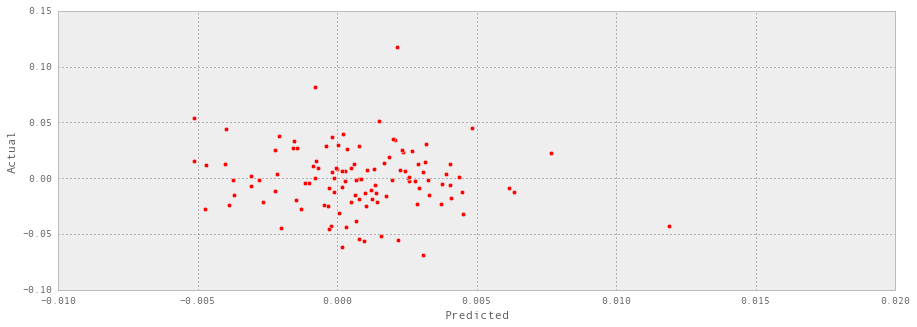

In [96]:
# Scatter the actual returns vs. predicted returns
Y_pred = model.predict(X_test)
Y_pred = pd.Series(Y_pred, index = Y_test.index)
plt.scatter(x=Y_pred, y=Y_test, c='r')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

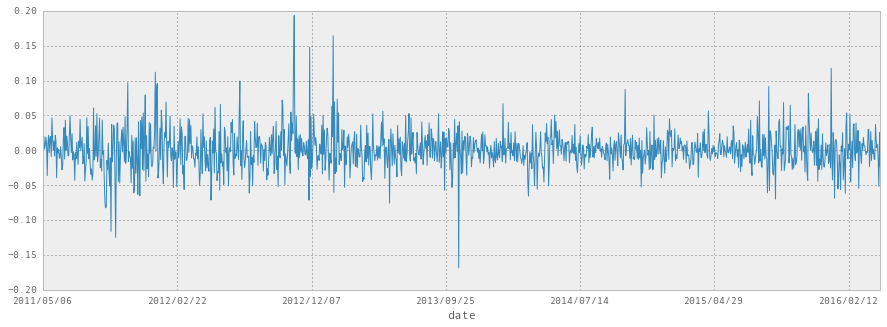

In [97]:
dataset['return'].plot()

## What have we learned?